In [15]:
import numpy as np
print(np.__version__)

1.14.5


In [16]:
import tensorflow as tf
print(tf.__version__)

1.10.1


In [17]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [18]:
# 下载数据集
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

print("训练集图像大小：{}".format(mnist.train.images.shape))
print("训练集标签大小：{}".format(mnist.train.labels.shape))
print("验证集图像大小：{}".format(mnist.validation.images.shape))
print("验证集标签大小：{}".format(mnist.validation.labels.shape))
print("测试集图像大小：{}".format(mnist.test.images.shape))
print("测试集标签大小：{}".format(mnist.test.labels.shape))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
训练集图像大小：(55000, 784)
训练集标签大小：(55000, 10)
验证集图像大小：(5000, 784)
验证集标签大小：(5000, 10)
测试集图像大小：(10000, 784)
测试集标签大小：(10000, 10)


In [0]:
# 为了便于读取，我们把数据集先各自使用一个变量指向它们
x_train, y_train = mnist.train.images, mnist.train.labels
x_valid, y_valid = mnist.validation.images, mnist.validation.labels
x_test, y_test = mnist.test.images, mnist.test.labels

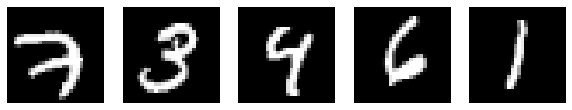

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 绘制和显示前5个训练集的图像 
fig = plt.figure(figsize=(10, 10))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(x_train[i:i+1], (28, 28)), cmap='gray')

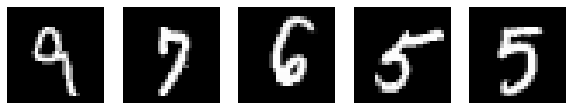

In [21]:
# 绘制和显示前(2*12)之后的五个训练集的图像 
fig = plt.figure(figsize=(10, 10))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(x_train[i+2*12:i+1+2*12], (28, 28)), cmap='gray')

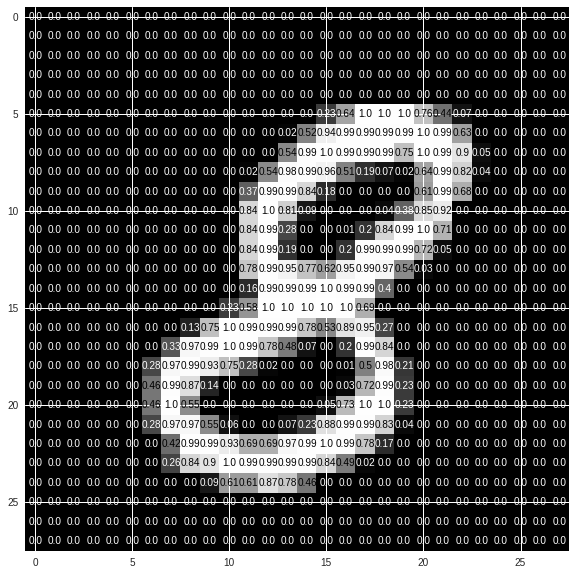

In [22]:
# 定义可视化图像的函数，传入一个图像向量和figure对象
def visualize_input(img, ax):
    # 绘制并输出图像
    ax.imshow(img, cmap='gray')
    
    # 对于该图像的宽和高，我们输出它们的具体的数值，
    # 以便于我们更清晰的知道计算机是如何看待一张图像的
    width, height = img.shape
    
    # 将图像中的具体数值转换成0-1之间的值
    thresh = img.max()/2.5 
    # 遍历行
    for x in range(width):
        # 遍历列
        for y in range(height):
            # 将图像的数值在它对应的位置上标出，且水平垂直居中
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)
# 假设我们就取出下标为5的样本来作为例子
visualize_input(np.reshape(x_train[5:6], (28, 28)), ax)

In [74]:
import math

# 参数准备
img_size = 28 * 28
num_classes = 10
learning_rate = 0.1
epochs = 100
batch_size = 128

# 创建模型
# x表示输入，创建输入占位符，该占位符会在训练时，会对每次迭代的数据进行填充上
x = tf.placeholder(tf.float32, [None, img_size])

# W表示weight，创建权重，初始化时都是为0，它的大小是(图像的向量大小，图像的总类别)
W = tf.Variable(tf.zeros([img_size, num_classes]))

# b表示bias，创建偏移项
b = tf.Variable(tf.zeros([num_classes]))

# y表示计算输出结果，softmax表示激活函数是多类别分类的输出
# 感知器的计算公式就是：(x * W) + b
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 定义输出预测占位符y_
y_ = tf.placeholder(tf.float32, [None, 10])

valid_feed_dict = { x: x_valid, y_: y_valid  }
test_feed_dict = { x: x_test, y_: y_test }

# 通过激活函数softmax的交叉熵来定义损失函数
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# 定义梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 比较正确的预测结果
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
# 计算预测准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
iteration = 0
# 定义训练时的检查点
saver = tf.train.Saver()

# 创建一个TensorFlow的会话
with tf.Session() as sess:
  
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
        
    # 根据每批次训练128个样本，计算出一共需要迭代多少次
    batch_count = int(math.ceil(mnist.train.labels.shape[0] / 128.0))
    
    # 开始迭代训练样本
    for e in range(epochs):
        
        # 每个样本都需要在TensorFlow的会话里进行运算，训练
        for batch_i in range(batch_count):
          
            # 样本的索引，间隔是128个
            batch_start = batch_i * batch_size
            # 取出图像样本
            batch_x = mnist.train.images[batch_start:batch_start+batch_size]
            # 取出图像对应的标签
            batch_y = mnist.train.labels[batch_start:batch_start+batch_size]
            # 训练模型
            loss, _ = sess.run([cost, optimizer], feed_dict={x: batch_x, y_: batch_y})
            
            # 每20个批次时输出一次训练损失等日志信息
            if batch_i % 20 == 0:
                print("Epoch: {}/{}".format(e+1, epochs), 
                      "Iteration: {}".format(iteration), 
                      "Training loss: {:.5f}".format(loss))
            iteration += 1

            # 每128个样本时，验证一下训练的效果如何，并输出日志信息
            if iteration % batch_size == 0:
                valid_acc = sess.run(accuracy, feed_dict=valid_feed_dict)
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Validation Accuracy: {:.5f}".format(valid_acc))
    
    # 保存训练模型的检查点
    saver.save(sess, "checkpoints/mnist_mlp_tf.ckpt")

Epoch: 1/100 Iteration: 0 Training loss: 2.30259
Epoch: 1/100 Iteration: 20 Training loss: 2.27273
Epoch: 1/100 Iteration: 40 Training loss: 2.19583
Epoch: 1/100 Iteration: 60 Training loss: 2.15586
Epoch: 1/100 Iteration: 80 Training loss: 2.07523
Epoch: 1/100 Iteration: 100 Training loss: 2.08399
Epoch: 1/100 Iteration: 120 Training loss: 1.94980
Epoch: 0/100 Iteration: 128 Validation Accuracy: 0.63220
Epoch: 1/100 Iteration: 140 Training loss: 1.91662
Epoch: 1/100 Iteration: 160 Training loss: 1.90578
Epoch: 1/100 Iteration: 180 Training loss: 1.85831
Epoch: 1/100 Iteration: 200 Training loss: 1.93051
Epoch: 1/100 Iteration: 220 Training loss: 1.85612
Epoch: 1/100 Iteration: 240 Training loss: 1.84803
Epoch: 0/100 Iteration: 256 Validation Accuracy: 0.78020
Epoch: 1/100 Iteration: 260 Training loss: 1.85057
Epoch: 1/100 Iteration: 280 Training loss: 1.77842
Epoch: 1/100 Iteration: 300 Training loss: 1.77178
Epoch: 1/100 Iteration: 320 Training loss: 1.83034
Epoch: 1/100 Iteration: 3

In [75]:
# 预测测试数据集精确度
saver = tf.train.Saver()
with tf.Session() as sess:
    # 从训练模型的检查点恢复
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # 预测测试集精确度
    test_acc = sess.run(accuracy, feed_dict=test_feed_dict)
    print("test accuracy: {:.5f}".format(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/mnist_mlp_tf.ckpt
test accuracy: 0.92560
